In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

# Sample structure of your data
# One row per participant per timepoint
data = pd.DataFrame({
    'Subject': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30],
    'Drink': ['Sprite', 'Sprite', 'Zero', 'Zero', 'Sprite', 'Sprite', 'Zero', 'Zero', 'Sprite', 'Sprite', 'Zero', 'Zero', 'Sprite', 'Sprite', 'Zero', 'Zero', 'Sprite', 'Sprite', 'Zero', 'Zero', 'Sprite', 'Sprite', 'Zero', 'Zero', 'Sprite', 'Sprite', 'Zero', 'Zero', 'Sprite', 'Sprite', 'Zero', 'Zero', 'Sprite', 'Sprite', 'Zero', 'Zero', 'Sprite', 'Sprite', 'Sprite', 'Sprite', 'Zero', 'Zero', 'Sprite', 'Sprite', 'Zero', 'Zero', 'Sprite', 'Sprite', 'Zero', 'Zero', 'Sprite', 'Sprite', 'Zero', 'Zero', 'Sprite', 'Sprite', 'Zero', 'Zero', 'Sprite', 'Sprite'],
    'Time': ['Pre', 'Post'] * 30,
    'Rating': [3.4, 3.95, 2.95, 2.65, 2.7, 2.95, 1.9, 2.65, 3.1, 3, 3.25, 3.95, 3.35, 4.55, 1.5, 2.65, 3.05, 3.55, 3.95, 4.1, 3.05, 3.5, 1.95, 3.1, 3.25, 3.55, 3.75, 4.4, 1.85, 3.15, 2.15, 2.65, 3.05, 2.7, 3, 3.85, 2.1, 2.4, 3.55, 4.55, 2.85, 2.75, 4.7, 4.75, 2.25, 2.85, 3.45, 4.05, 3.25, 3.1, 3.75, 3.65, 3.15, 3.65, 2.85, 3.35, 2.25, 2.55, 2.9, 3.4]
})

# Specify the model with both within and between factors using 'C()' for categorical variables
model = ols('Rating ~ C(Time) * C(Drink) + C(Subject)', data=data).fit()

# Obtain the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                     sum_sq    df          F        PR(>F)
C(Time)            3.128167   1.0  30.220550  7.135961e-06
C(Drink)           0.938149   1.0   9.063255  5.472938e-03
C(Subject)        23.552227  29.0   7.845967  2.401022e-07
C(Time):C(Drink)   0.008519   1.0   0.082296  7.763214e-01
Residual           2.898315  28.0        NaN           NaN


In [ ]:
data.head()

,Subject,Drink,Time,Rating
0,1,Sprite,Pre,3.40
1,1,Sprite,Post,3.95
2,2,Zero,Pre,2.95
3,2,Zero,Post,2.65
4,3,Sprite,Pre,2.70


<ipython-input-5-b419aca5f634>:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(


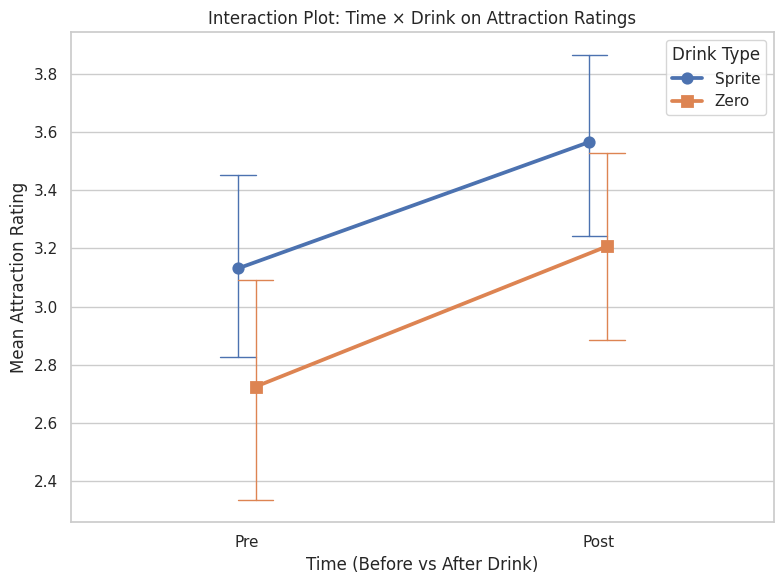

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.pointplot(
    data=data,
    x='Time',
    y='Rating',
    hue='Drink',
    dodge=True,
    markers=['o', 's'],
    capsize=.1,
    errwidth=1,
    palette='deep'
)

plt.title('Interaction Plot: Time × Drink on Attraction Ratings')
plt.ylabel('Mean Attraction Rating')
plt.xlabel('Time (Before vs After Drink)')
plt.legend(title='Drink Type')
plt.tight_layout()
plt.show()

<ipython-input-5-1d1ad9b387b8>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
<ipython-input-5-1d1ad9b387b8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


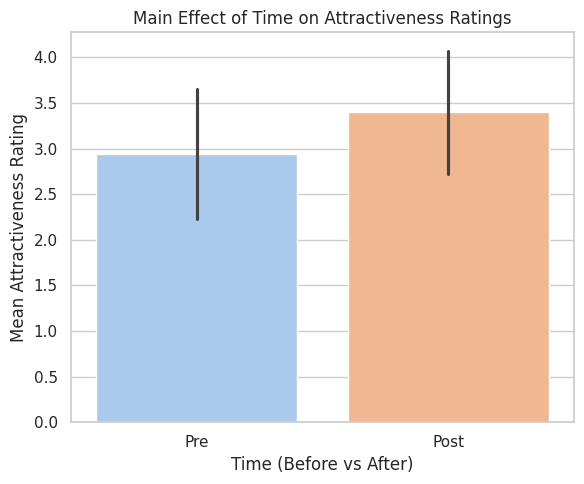

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 5))
sns.barplot(
    data=data,
    x='Time',
    y='Rating',
    ci='sd',  # Or use ci=95 for confidence intervals
    palette='pastel'
)

plt.title('Main Effect of Time on Attractiveness Ratings')
plt.ylabel('Mean Attractiveness Rating')
plt.xlabel('Time (Before vs After)')
plt.tight_layout()
plt.show()


<ipython-input-6-f17126c018ee>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
<ipython-input-6-f17126c018ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


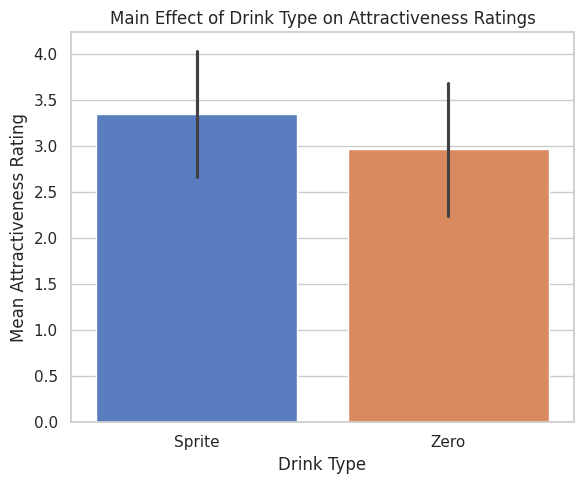

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(
    data=data,
    x='Drink',
    y='Rating',
    ci='sd',
    palette='muted'
)

plt.title('Main Effect of Drink Type on Attractiveness Ratings')
plt.ylabel('Mean Attractiveness Rating')
plt.xlabel('Drink Type')
plt.tight_layout()
plt.show()


In [ ]:
# Calculate RatingChange per Subject
rating_change_per_subject = data.groupby('Subject').apply(lambda x: x[x['Time'] == 'Post']['Rating'].mean() - x[x['Time'] == 'Pre']['Rating'].mean())

# Create a new column in the original DataFrame and assign the values
data['RatingChange'] = data['Subject'].map(rating_change_per_subject)


<ipython-input-7-5b3fec3577fe>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rating_change_per_subject = data.groupby('Subject').apply(lambda x: x[x['Time'] == 'Post']['Rating'].mean() - x[x['Time'] == 'Pre']['Rating'].mean())


In [ ]:
data

,Subject,Drink,Time,Rating,RatingChange
0,1,Sprite,Pre,3.40,0.55
1,1,Sprite,Post,3.95,0.55
2,2,Zero,Pre,2.95,-0.30
3,2,Zero,Post,2.65,-0.30
4,3,Sprite,Pre,2.70,0.25
5,3,Sprite,Post,2.95,0.25
6,4,Zero,Pre,1.90,0.75
7,4,Zero,Post,2.65,0.75
8,5,Sprite,Pre,3.10,-0.10
9,5,Sprite,Post,3.00,-0.10


In [ ]:
data['Insulin Levels'] = [0,0,0,0,0,0,0,0,0,0,0,0, 20.529, 20.529, 11.354, 11.354, 0,0, 4.377, 4.377, 83.954, 83.954, 0,0, 6.792, 6.792, 37.301, 37.301, 0,0, 5.841, 5.841, 0,0,0,0, 5.789, 5.789, 0,0,0,0, 19.585, 19.585, 16.327, 16.327, 6.852, 6.852, 0,0,0,0,0,0,0,0,0,0,0,0 ]

In [ ]:
data

,Subject,Drink,Time,Rating,RatingChange,Insulin Levels
0,1,Sprite,Pre,3.40,0.55,0.000
1,1,Sprite,Post,3.95,0.55,0.000
2,2,Zero,Pre,2.95,-0.30,0.000
3,2,Zero,Post,2.65,-0.30,0.000
4,3,Sprite,Pre,2.70,0.25,0.000
5,3,Sprite,Post,2.95,0.25,0.000
6,4,Zero,Pre,1.90,0.75,0.000
7,4,Zero,Post,2.65,0.75,0.000
8,5,Sprite,Pre,3.10,-0.10,0.000
9,5,Sprite,Post,3.00,-0.10,0.000


In [ ]:
X = sm.add_constant(data['Insulin Levels'])
y = data['RatingChange']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           RatingChange   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.5975
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.443
Time:                        15:48:30   Log-Likelihood:                -35.599
No. Observations:                  60   AIC:                             75.20
Df Residuals:                      58   BIC:                             79.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4371      0.063      6.

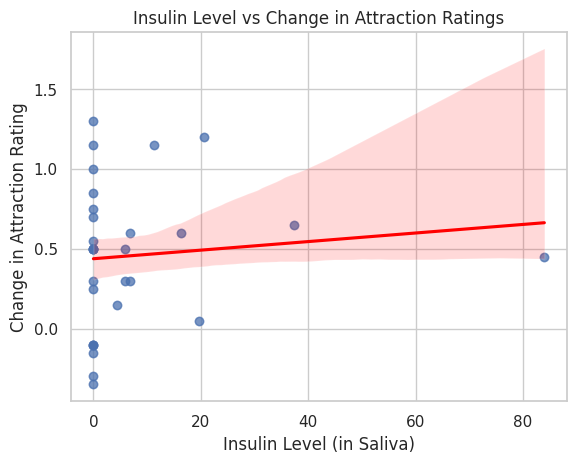

In [ ]:
sns.regplot(
    data=data,
    x='Insulin Levels',
    y='RatingChange',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)

plt.title("Insulin Level vs Change in Attraction Ratings")
plt.xlabel("Insulin Level (in Saliva)")
plt.ylabel("Change in Attraction Rating")
plt.show()

In [ ]:
insulin_cleaned = data[data['Insulin Levels'] != 0]

In [ ]:
insulin_cleaned

,Subject,Drink,Time,Rating,RatingChange,Insulin Levels
12,7,Sprite,Pre,3.35,1.20,20.529
13,7,Sprite,Post,4.55,1.20,20.529
14,8,Zero,Pre,1.50,1.15,11.354
15,8,Zero,Post,2.65,1.15,11.354
18,10,Zero,Pre,3.95,0.15,4.377
19,10,Zero,Post,4.10,0.15,4.377
20,11,Sprite,Pre,3.05,0.45,83.954
21,11,Sprite,Post,3.50,0.45,83.954
24,13,Sprite,Pre,3.25,0.30,6.792
25,13,Sprite,Post,3.55,0.30,6.792


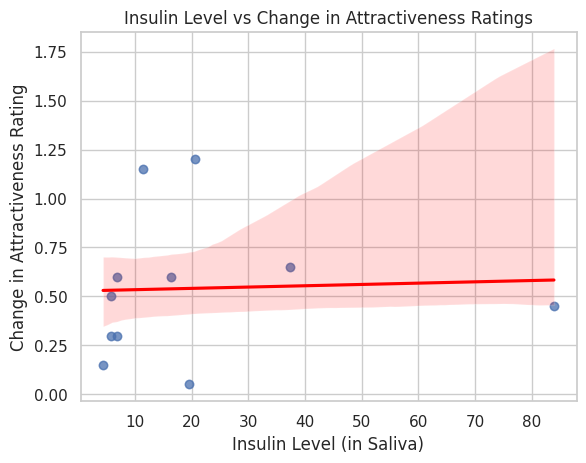

In [ ]:
sns.regplot(
    data=insulin_cleaned,
    x='Insulin Levels',
    y='RatingChange',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)

plt.title("Insulin Level vs Change in Attractiveness Ratings")
plt.xlabel("Insulin Level (in Saliva)")
plt.ylabel("Change in Attractiveness Rating")
plt.show()

In [ ]:
X = sm.add_constant(insulin_cleaned['Insulin Levels'])
y = insulin_cleaned['RatingChange']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           RatingChange   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                   0.03644
Date:                Tue, 15 Apr 2025   Prob (F-statistic):              0.851
Time:                        15:05:51   Log-Likelihood:                -8.0727
No. Observations:                  22   AIC:                             20.15
Df Residuals:                      20   BIC:                             22.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5276      0.105      5.

In [ ]:
#mean of insulin levels in insulin cleaned
insulin_cleaned['Insulin Levels'].mean()

np.float64(19.881909090909087)

In [ ]:
post_measure = insulin_cleaned[insulin_cleaned['Time'] == 'Post']

In [ ]:
post_measure

,Subject,Drink,Time,Rating,RatingChange,Insulin Levels
13,7,Sprite,Post,4.55,1.20,20.529
15,8,Zero,Post,2.65,1.15,11.354
19,10,Zero,Post,4.10,0.15,4.377
21,11,Sprite,Post,3.50,0.45,83.954
25,13,Sprite,Post,3.55,0.30,6.792
27,14,Zero,Post,4.40,0.65,37.301
31,16,Zero,Post,2.65,0.50,5.841
37,19,Sprite,Post,2.40,0.30,5.789
43,22,Sprite,Post,4.75,0.05,19.585
45,23,Zero,Post,2.85,0.60,16.327


In [ ]:
#t test for sprite and sprite zero compared to insulin levels
from scipy import stats
stats.ttest_ind(post_measure[post_measure['Drink'] == 'Sprite']['RatingChange'], post_measure[post_measure['Drink'] == 'Zero']['RatingChange'])

TtestResult(statistic=np.float64(-0.5503266363523945), pvalue=np.float64(0.5954879973215632), df=np.float64(9.0))